In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_squared_error

In [15]:
df = pd.read_csv('./insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
df.shape

(1338, 7)

<Axes: xlabel='logbmi', ylabel='Count'>

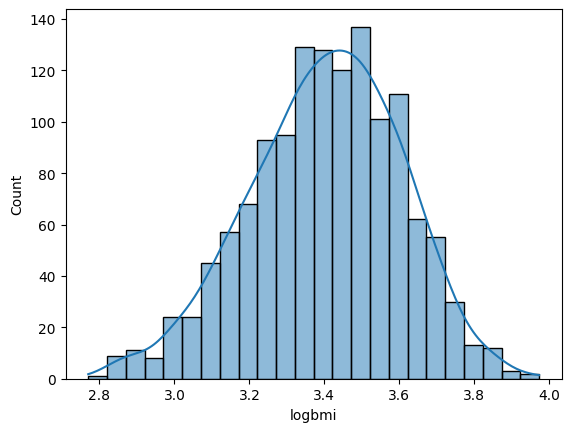

In [22]:
# distribution of bmi look like after applying the log transformation on it
df['logbmi'] = np.log(df['bmi'])
sns.histplot(df['logbmi'], kde=True)


<Axes: >

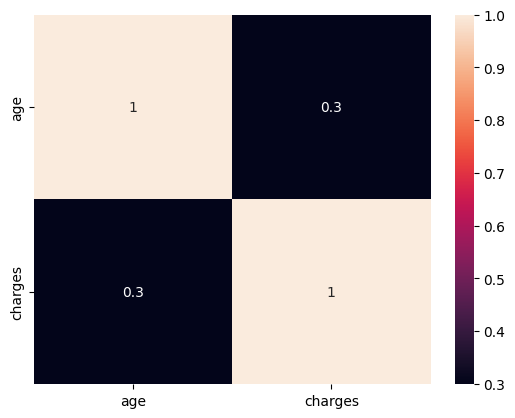

In [18]:
# heatmap to check the correlation between the age and charges
sns.heatmap(df[['age', 'charges']].corr(), annot=True)

In [20]:
# create dummy variables for the region column
#pd.get_dummies(df['region'], drop_first=True)
 
df = pd.concat([df, pd.get_dummies(df['region'], drop_first=True)], axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,logbmi,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,3.328627,False,False,True
1,18,male,33.770,1,no,southeast,1725.55230,3.519573,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,3.496508,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,3.122585,True,False,False
4,32,male,28.880,0,no,northwest,3866.85520,3.363149,True,False,False


In [31]:
 
df = pd.concat([df, pd.get_dummies(df['smoker'], drop_first=True)], axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest,logbmi,yes
0,19,female,27.900,0,yes,southwest,16884.92400,False,False,True,3.328627,True
1,18,male,33.770,1,no,southeast,1725.55230,False,True,False,3.519573,False
2,28,male,33.000,3,no,southeast,4449.46200,False,True,False,3.496508,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False,False,3.122585,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False,False,3.363149,False


In [32]:
x= df[['age', 'bmi', 'children', 'yes',  'northwest', 'southeast', 'southwest']];
y= df['charges'];

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=1)  
xtest.shape
ytest.shape

(402,)

In [34]:
regressionmodel =  LinearRegression()
regressionmodel.fit(xtrain,ytrain)

LinearRegression()

In [35]:
regressionmodel.intercept_

-11152.388511786221

In [36]:
# r square value of training data
regressionmodel.score(xtrain,ytrain)

0.7544224312627719

In [48]:
# Add an interaction term using polynomial features of degree 2 
# and train a linear regression model. Identify the correct range for the R^2 on training data. 

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True)
xtrain_poly = poly.fit_transform(xtrain)
#ytrain_poly = poly.fit_transform(ytrain)
xtest_poly = poly.fit_transform(xtest)
#ytest_poly = poly.fit_transform(ytest)

regressionmodel.fit(xtrain_poly,ytrain)
print(regressionmodel.score(xtrain_poly,ytrain))
print(regressionmodel.score(xtest_poly,ytest))

0.8424514062867108
0.8430220250033535


In [52]:
from sklearn.metrics import mean_absolute_error

lr_sklearn = LinearRegression().fit(xtrain,ytrain)
y_pred = lr_sklearn.predict(xtest)

mean_absolute_error(ytest, y_pred)

4140.032259878922